<a href="https://colab.research.google.com/github/koalalovepabro/Stock-Portfolio-Optimization/blob/main/Test/Stock_Portfolio(KODEX_%EB%B0%98%EB%8F%84%EC%B2%B4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최적화된 주식 포트폴리오 만들기

## 💘 KODEX 반도체 ETF 종목 ( 37개 )

In [48]:
import pandas as pd
import numpy as np
import requests
import warnings

In [49]:
warnings.filterwarnings(action='ignore')

In [50]:
!pip install -q install finance-datareader

In [51]:
# Finance Datareader 불러오고, 버전 확인하기
import FinanceDataReader as fdr
fdr.__version__

'0.9.31'

### ETF 종목 불러오기

In [4]:
etf = pd.read_csv ( "KODEX_반도체_20210719.csv" , parse_dates = True)
etf

,Stock,Symbol,Allocation,Weights,Current Price
0,SK하이닉스,660,"3,054",0.1962,"118,500"
1,DB하이텍,990,"2,294",0.0769,"65,900"
2,리노공업,58470,648,0.0638,"185,900"
3,원익IPS,240810,"2,151",0.0541,"46,950"
4,고영,98460,"3,592",0.0449,"24,100"
5,LX세미콘,108320,713,0.0444,"119,500"
6,티씨케이,64760,428,0.0439,"196,800"
7,이오테크닉스,39030,548,0.0324,"110,100"
8,한미반도체,42700,"1,423",0.0255,"38,200"
9,서울반도체,46890,"2,478",0.0246,"18,450"


In [5]:
etf['Symbol'] = etf['Symbol'].apply(lambda x: '{0:0>6}'.format(x))
etf

,Stock,Symbol,Allocation,Weights,Current Price
0,SK하이닉스,000660,"3,054",0.1962,"118,500"
1,DB하이텍,000990,"2,294",0.0769,"65,900"
2,리노공업,058470,648,0.0638,"185,900"
3,원익IPS,240810,"2,151",0.0541,"46,950"
4,고영,098460,"3,592",0.0449,"24,100"
5,LX세미콘,108320,713,0.0444,"119,500"
6,티씨케이,064760,428,0.0439,"196,800"
7,이오테크닉스,039030,548,0.0324,"110,100"
8,한미반도체,042700,"1,423",0.0255,"38,200"
9,서울반도체,046890,"2,478",0.0246,"18,450"


## 주가 데이터 불러오기(Finance DataReader)

In [6]:
# 종목코드 가져오기
assets = etf['Symbol']
assets

0     000660
1     000990
2     058470
3     240810
4     098460
5     108320
6     064760
7     039030
8     042700
9     046890
10    033640
11    218410
12    084370
13    131970
14    101490
15    036540
16    036930
17    166090
18    074600
19    222800
20    272290
21    319660
22    195870
23    089030
24    095610
25    183300
26    084850
27    036810
28    061970
29    086390
30    059090
31    265520
32    281820
33    030530
34    108230
35    092190
36    322000
Name: Symbol, dtype: object

In [7]:
assets = np.array(assets)
assets

array(['000660', '000990', '058470', '240810', '098460', '108320',
       '064760', '039030', '042700', '046890', '033640', '218410',
       '084370', '131970', '101490', '036540', '036930', '166090',
       '074600', '222800', '272290', '319660', '195870', '089030',
       '095610', '183300', '084850', '036810', '061970', '086390',
       '059090', '265520', '281820', '030530', '108230', '092190',
       '322000'], dtype=object)

In [8]:
len(assets)

37

### 3년치 주가 데이터 가져오기

In [9]:
# 종목별 종가 가져오기
from datetime import datetime

#시작일
start_date = '2018-07-19'

# today = datetime.today().strftime('%Y-%m-%d')
end_date = '2021-07-19'

# 각 주식의 일별 종가 데이터를 저장할 데이터 프레임을 생성
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# FinanceDataReader로 각 종목의 종가데이터 불러오기
for stock in assets:
  df[stock] = fdr.DataReader(stock, start_date, end_date)['Close']
df

,000660,000990,058470,240810,098460,108320,064760,039030,042700,046890,033640,218410,084370,131970,101490,036540,036930,166090,074600,222800,272290,319660,195870,089030,095610,183300,084850,036810,061970,086390,059090,265520,281820,030530,108230,092190,322000
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,90300,18250,66300,29100,22220,41900,72000,68600,10000,19650,12450,24636,16400,11673,4045,1980,8700,21200,15300,8515,53253,NaN,20350,14850,23950,31350,NaN,5680,4170,19300,4005,24300,17600,5490,26000,NaN,NaN
2018-07-20,87900,18200,66600,28200,21740,41950,70100,68000,9670,19050,12400,24538,16250,12001,4065,1980,8770,21900,15250,8620,53161,NaN,20150,14600,22650,32400,NaN,5730,4170,19950,3980,24350,17450,5560,25250,NaN,NaN
2018-07-23,81700,17050,64300,26700,20720,40250,64100,65500,9440,18250,12050,23758,15400,10868,4020,1925,8630,20050,14450,8353,51414,NaN,19150,14350,20850,30500,NaN,5210,4000,18000,3890,23250,16850,5240,24600,NaN,NaN
2018-07-24,83600,17400,65700,25800,22220,42200,63900,62100,9560,19850,12400,23465,15500,10390,3940,1930,8820,19850,14650,8458,52150,NaN,19050,14400,20700,31400,NaN,5420,4120,18100,3880,23300,17050,5290,24900,NaN,NaN
2018-07-25,80500,17350,64900,24550,21740,42700,62600,62300,9640,19600,11500,25465,14200,11447,3820,1855,8820,20250,14700,8467,52150,NaN,18750,13800,19950,30400,NaN,5390,4370,17800,3795,22700,16550,5070,24250,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,123000,64500,188600,47400,23600,113500,198900,115200,33950,18850,42050,37600,42950,53700,32000,7300,14400,43550,28550,23300,65900,42000.0,40400,25450,30300,64300,48300.0,27400,13950,22200,13800,29900,28050,6270,12050,17350.0,30900.0
2021-07-14,123500,64400,186100,46600,23450,121200,195700,114000,33600,18600,41600,37350,42850,53300,31400,7240,14150,43450,28700,23250,65000,41250.0,41700,25700,30200,64700,47600.0,27100,14000,22100,14350,30050,27550,6230,11950,17750.0,31050.0
2021-07-15,123500,66200,188000,48400,23900,119200,196200,114400,34250,18950,42400,38800,43950,52700,35300,7410,14300,45550,29650,23950,67100,42600.0,42300,25900,31000,65400,52000.0,28800,14300,22350,14300,30700,28400,6320,12100,17500.0,31050.0


In [10]:
# 칼럼명을 회사이름으로 변경
df.columns = etf['Stock'].values
df

,SK하이닉스,DB하이텍,리노공업,원익IPS,고영,LX세미콘,티씨케이,이오테크닉스,한미반도체,서울반도체,네패스,RFHIC,유진테크,테스나,에스앤에스텍,SFA반도체,주성엔지니어링,하나머티리얼즈,원익QnC,심텍,이녹스첨단소재,피에스케이,해성디에스,테크윙,테스,코미코,아이티엠반도체,에프에스티,엘비세미콘,유니테스트,미코,AP시스템,케이씨텍,원익홀딩스,톱텍,서울바이오시스,현대에너지솔루션
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,90300,18250,66300,29100,22220,41900,72000,68600,10000,19650,12450,24636,16400,11673,4045,1980,8700,21200,15300,8515,53253,NaN,20350,14850,23950,31350,NaN,5680,4170,19300,4005,24300,17600,5490,26000,NaN,NaN
2018-07-20,87900,18200,66600,28200,21740,41950,70100,68000,9670,19050,12400,24538,16250,12001,4065,1980,8770,21900,15250,8620,53161,NaN,20150,14600,22650,32400,NaN,5730,4170,19950,3980,24350,17450,5560,25250,NaN,NaN
2018-07-23,81700,17050,64300,26700,20720,40250,64100,65500,9440,18250,12050,23758,15400,10868,4020,1925,8630,20050,14450,8353,51414,NaN,19150,14350,20850,30500,NaN,5210,4000,18000,3890,23250,16850,5240,24600,NaN,NaN
2018-07-24,83600,17400,65700,25800,22220,42200,63900,62100,9560,19850,12400,23465,15500,10390,3940,1930,8820,19850,14650,8458,52150,NaN,19050,14400,20700,31400,NaN,5420,4120,18100,3880,23300,17050,5290,24900,NaN,NaN
2018-07-25,80500,17350,64900,24550,21740,42700,62600,62300,9640,19600,11500,25465,14200,11447,3820,1855,8820,20250,14700,8467,52150,NaN,18750,13800,19950,30400,NaN,5390,4370,17800,3795,22700,16550,5070,24250,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,123000,64500,188600,47400,23600,113500,198900,115200,33950,18850,42050,37600,42950,53700,32000,7300,14400,43550,28550,23300,65900,42000.0,40400,25450,30300,64300,48300.0,27400,13950,22200,13800,29900,28050,6270,12050,17350.0,30900.0
2021-07-14,123500,64400,186100,46600,23450,121200,195700,114000,33600,18600,41600,37350,42850,53300,31400,7240,14150,43450,28700,23250,65000,41250.0,41700,25700,30200,64700,47600.0,27100,14000,22100,14350,30050,27550,6230,11950,17750.0,31050.0
2021-07-15,123500,66200,188000,48400,23900,119200,196200,114400,34250,18950,42400,38800,43950,52700,35300,7410,14300,45550,29650,23950,67100,42600.0,42300,25900,31000,65400,52000.0,28800,14300,22350,14300,30700,28400,6320,12100,17500.0,31050.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2018-07-19 to 2021-07-19
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SK하이닉스    740 non-null    int64  
 1   DB하이텍     740 non-null    int64  
 2   리노공업      740 non-null    int64  
 3   원익IPS     740 non-null    int64  
 4   고영        740 non-null    int64  
 5   LX세미콘     740 non-null    int64  
 6   티씨케이      740 non-null    int64  
 7   이오테크닉스    740 non-null    int64  
 8   한미반도체     740 non-null    int64  
 9   서울반도체     740 non-null    int64  
 10  네패스       740 non-null    int64  
 11  RFHIC     740 non-null    int64  
 12  유진테크      740 non-null    int64  
 13  테스나       740 non-null    int64  
 14  에스앤에스텍    740 non-null    int64  
 15  SFA반도체    740 non-null    int64  
 16  주성엔지니어링   740 non-null    int64  
 17  하나머티리얼즈   740 non-null    int64  
 18  원익QnC     740 non-null    int64  
 19  심텍        740 non-null    int64  
 20  이녹스첨단소재   740

In [12]:
df.isnull().sum()

SK하이닉스        0
DB하이텍         0
리노공업          0
원익IPS         0
고영            0
LX세미콘         0
티씨케이          0
이오테크닉스        0
한미반도체         0
서울반도체         0
네패스           0
RFHIC         0
유진테크          0
테스나           0
에스앤에스텍        0
SFA반도체        0
주성엔지니어링       0
하나머티리얼즈       0
원익QnC         0
심텍            0
이녹스첨단소재       0
피에스케이       196
해성디에스         0
테크윙           0
테스            0
코미코           0
아이티엠반도체     319
에프에스티         0
엘비세미콘         0
유니테스트         0
미코            0
AP시스템         0
케이씨텍          0
원익홀딩스         0
톱텍            0
서울바이오시스     400
현대에너지솔루션    327
dtype: int64

In [13]:
# 결측값 있는 열 삭제  ( 종목 37  -> 33으로 줄어 듦 )
df = df.dropna(axis = 1)
df

,SK하이닉스,DB하이텍,리노공업,원익IPS,고영,LX세미콘,티씨케이,이오테크닉스,한미반도체,서울반도체,네패스,RFHIC,유진테크,테스나,에스앤에스텍,SFA반도체,주성엔지니어링,하나머티리얼즈,원익QnC,심텍,이녹스첨단소재,해성디에스,테크윙,테스,코미코,에프에스티,엘비세미콘,유니테스트,미코,AP시스템,케이씨텍,원익홀딩스,톱텍
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,90300,18250,66300,29100,22220,41900,72000,68600,10000,19650,12450,24636,16400,11673,4045,1980,8700,21200,15300,8515,53253,20350,14850,23950,31350,5680,4170,19300,4005,24300,17600,5490,26000
2018-07-20,87900,18200,66600,28200,21740,41950,70100,68000,9670,19050,12400,24538,16250,12001,4065,1980,8770,21900,15250,8620,53161,20150,14600,22650,32400,5730,4170,19950,3980,24350,17450,5560,25250
2018-07-23,81700,17050,64300,26700,20720,40250,64100,65500,9440,18250,12050,23758,15400,10868,4020,1925,8630,20050,14450,8353,51414,19150,14350,20850,30500,5210,4000,18000,3890,23250,16850,5240,24600
2018-07-24,83600,17400,65700,25800,22220,42200,63900,62100,9560,19850,12400,23465,15500,10390,3940,1930,8820,19850,14650,8458,52150,19050,14400,20700,31400,5420,4120,18100,3880,23300,17050,5290,24900
2018-07-25,80500,17350,64900,24550,21740,42700,62600,62300,9640,19600,11500,25465,14200,11447,3820,1855,8820,20250,14700,8467,52150,18750,13800,19950,30400,5390,4370,17800,3795,22700,16550,5070,24250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,123000,64500,188600,47400,23600,113500,198900,115200,33950,18850,42050,37600,42950,53700,32000,7300,14400,43550,28550,23300,65900,40400,25450,30300,64300,27400,13950,22200,13800,29900,28050,6270,12050
2021-07-14,123500,64400,186100,46600,23450,121200,195700,114000,33600,18600,41600,37350,42850,53300,31400,7240,14150,43450,28700,23250,65000,41700,25700,30200,64700,27100,14000,22100,14350,30050,27550,6230,11950
2021-07-15,123500,66200,188000,48400,23900,119200,196200,114400,34250,18950,42400,38800,43950,52700,35300,7410,14300,45550,29650,23950,67100,42300,25900,31000,65400,28800,14300,22350,14300,30700,28400,6320,12100


In [52]:
!pip install PyPortfolioOpt

In [15]:
# Optimize the portfolio
import pypfopt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [16]:
# Calculate the expected annualized returns
# 복리 연평균 수익률
# return (1 + returns).prod() ** (frequency / returns.count()) - 1
mu = expected_returns.mean_historical_return(df) 

# Calculate the annualized sample covariance matrix of the daily asset returns
S = risk_models.sample_cov(df)

In [17]:
mu

SK하이닉스     0.098682
DB하이텍      0.536420
리노공업       0.425470
원익IPS      0.176746
고영         0.028083
LX세미콘      0.430394
티씨케이       0.411930
이오테크닉스     0.172881
한미반도체      0.555770
서울반도체     -0.018552
네패스        0.490750
RFHIC      0.165470
유진테크       0.388055
테스나        0.657792
에스앤에스텍     1.067731
SFA반도체     0.555264
주성엔지니어링    0.187479
하나머티리얼즈    0.301362
원익QnC      0.241453
심텍         0.407470
이녹스첨단소재    0.097729
해성디에스      0.303778
테크윙        0.208066
테스         0.082279
코미코        0.276888
에프에스티      0.705910
엘비세미콘      0.507656
유니테스트      0.052907
미코         0.561610
AP시스템      0.073890
케이씨텍       0.180052
원익홀딩스      0.039471
톱텍        -0.235053
dtype: float64

In [18]:
len(mu)

33

In [19]:
S

,SK하이닉스,DB하이텍,리노공업,원익IPS,고영,LX세미콘,티씨케이,이오테크닉스,한미반도체,서울반도체,네패스,RFHIC,유진테크,테스나,에스앤에스텍,SFA반도체,주성엔지니어링,하나머티리얼즈,원익QnC,심텍,이녹스첨단소재,해성디에스,테크윙,테스,코미코,에프에스티,엘비세미콘,유니테스트,미코,AP시스템,케이씨텍,원익홀딩스,톱텍
SK하이닉스,0.145887,0.090011,0.047503,0.104122,0.075687,0.079213,0.087621,0.103849,0.088496,0.068934,0.066689,0.038525,0.089025,0.071905,0.064464,0.062571,0.087155,0.114782,0.101739,0.085083,0.078842,0.058649,0.092778,0.108230,0.079966,0.093892,0.074422,0.102518,0.029919,0.071850,0.089359,0.085932,0.037664
DB하이텍,0.090011,0.270529,0.068724,0.128587,0.090142,0.100167,0.108432,0.145046,0.115899,0.086374,0.113382,0.064119,0.118893,0.116271,0.104518,0.106172,0.113245,0.130369,0.131466,0.126367,0.099575,0.105633,0.135445,0.130563,0.114687,0.145959,0.133886,0.139063,0.072243,0.086916,0.113953,0.115947,0.059590
리노공업,0.047503,0.068724,0.137417,0.073094,0.061154,0.068139,0.088365,0.084279,0.072033,0.049804,0.063793,0.035529,0.065646,0.076162,0.050208,0.055497,0.062189,0.081495,0.075382,0.064975,0.061509,0.061636,0.085121,0.075755,0.071701,0.074954,0.083037,0.075693,0.030946,0.056449,0.066156,0.068229,0.036627
원익IPS,0.104122,0.128587,0.073094,0.244878,0.098651,0.122717,0.136698,0.179817,0.135389,0.099087,0.104713,0.075084,0.156971,0.120581,0.103890,0.117871,0.130332,0.160849,0.169509,0.126280,0.126848,0.097212,0.157124,0.189543,0.136935,0.141031,0.113216,0.147537,0.084165,0.132839,0.151047,0.149228,0.084871
고영,0.075687,0.090142,0.061154,0.098651,0.229050,0.084579,0.094110,0.106246,0.078563,0.075594,0.066028,0.047243,0.075316,0.076684,0.064460,0.076515,0.085097,0.104333,0.096432,0.096883,0.079626,0.062545,0.104187,0.097781,0.073502,0.088919,0.087445,0.092411,0.034829,0.079927,0.079806,0.091825,0.044351
LX세미콘,0.079213,0.100167,0.068139,0.122717,0.084579,0.219455,0.106237,0.130735,0.103677,0.086460,0.086540,0.060875,0.107575,0.094677,0.069865,0.084000,0.102638,0.132609,0.120507,0.101758,0.109986,0.090022,0.121568,0.114305,0.112535,0.118212,0.118792,0.117911,0.056860,0.103353,0.107668,0.108835,0.047015
티씨케이,0.087621,0.108432,0.088365,0.136698,0.094110,0.106237,0.261765,0.141434,0.125391,0.085542,0.091641,0.065249,0.130005,0.120297,0.087505,0.095150,0.115219,0.157175,0.144333,0.108059,0.112475,0.090138,0.131885,0.142060,0.131013,0.136764,0.116379,0.122475,0.062014,0.103693,0.126447,0.116370,0.059002
이오테크닉스,0.103849,0.145046,0.084279,0.179817,0.106246,0.130735,0.141434,0.329618,0.152262,0.101181,0.112227,0.072904,0.157616,0.137131,0.118339,0.124767,0.155797,0.170712,0.170771,0.148289,0.140323,0.113634,0.183055,0.189873,0.148971,0.161893,0.125907,0.162492,0.095811,0.134566,0.167267,0.149408,0.082309
한미반도체,0.088496,0.115899,0.072033,0.135389,0.078563,0.103677,0.125391,0.152262,0.272523,0.077852,0.098830,0.059639,0.137645,0.127763,0.096064,0.114884,0.120507,0.164661,0.143448,0.117783,0.116857,0.099982,0.160872,0.161060,0.142673,0.150808,0.122212,0.155278,0.096814,0.096891,0.147530,0.125992,0.069963
서울반도체,0.068934,0.086374,0.049804,0.099087,0.075594,0.086460,0.085542,0.101181,0.077852,0.196954,0.072411,0.050920,0.079838,0.076944,0.064113,0.075369,0.087744,0.095540,0.097493,0.087980,0.085957,0.070038,0.093481,0.093454,0.074273,0.099502,0.087669,0.098594,0.067647,0.082810,0.075281,0.085390,0.067970


In [20]:
len(S)

33

In [21]:
S.shape

(33, 33)

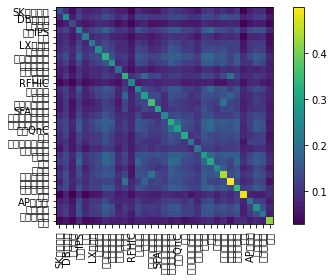

In [53]:
# 수익률의 공분산
from pypfopt import plotting

plotting.plot_covariance(S)

# 포트폴리오 최적화

In [68]:
# Optimize for the maximal Sharpe ratio
# 💛데이터셋이 너무 많으면, ef.max_sharpe()에서 에러남 -> solver를 SCS로 바꿔줌
# Default Solver는 OSQP 이며, SCS로 설정을 바꿔도 결과는 동일함
# Robert says: 100개 이하로 종목을 추린 후에 실행시키기를 추천함 !
ef = EfficientFrontier(mu, S)  # Create the Efficient Frontier Object

# Maximize the Sharpe ratio, and get the raw weights
# max_sharpe()-> optimizes for maximal Sharpe ratio (a.k.a the tangency portfolio)
# 결과값 : CML(자본시장선)과 효율적 투자선(efficient frontier)의 접점에 있는 포트폴리오
weights = ef.max_sharpe()

# clean_weights()-> rounds the weights and clips near-zeros.
# weights < 0.0001 => clean_weights = 0
# cleaned_weights => 소숫점 5자리까지 표시
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef.portfolio_performance(verbose=True)

OrderedDict([('SK하이닉스', 0.0), ('DB하이텍', 0.02413), ('리노공업', 0.27354), ('원익IPS', 0.0), ('고영', 0.0), ('LX세미콘', 0.03011), ('티씨케이', 0.0), ('이오테크닉스', 0.0), ('한미반도체', 0.04181), ('서울반도체', 0.0), ('네패스', 0.0), ('RFHIC', 0.0), ('유진테크', 0.0), ('테스나', 0.0656), ('에스앤에스텍', 0.43251), ('SFA반도체', 0.03479), ('주성엔지니어링', 0.0), ('하나머티리얼즈', 0.0), ('원익QnC', 0.0), ('심텍', 0.0), ('이녹스첨단소재', 0.0), ('해성디에스', 0.0), ('테크윙', 0.0), ('테스', 0.0), ('코미코', 0.0), ('에프에스티', 0.0), ('엘비세미콘', 0.0), ('유니테스트', 0.0), ('미코', 0.09751), ('AP시스템', 0.0), ('케이씨텍', 0.0), ('원익홀딩스', 0.0), ('톱텍', 0.0)])
Expected annual return: 74.5%
Annual volatility: 36.8%
Sharpe Ratio: 1.97


(0.7445606579521322, 0.368451998509187, 1.9664994650152943)

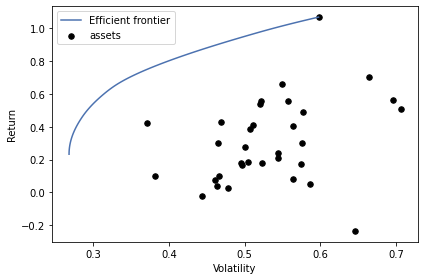

In [69]:
# 효율적 투자선과 각 종목의 수익률 & 변동성
import matplotlib.pyplot as plt

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

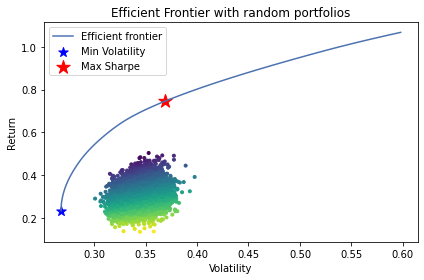

In [70]:
# Show Efficient Frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Minimize.volatility
ef.min_volatility()
ret_minv, std_minv, _ = ef.portfolio_performance()
ax.scatter(std_minv, ret_minv, marker="*", s=100, c="b", label="Min Volatility")

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()  # 기대수익률 , Risk(변동성)
ax.scatter(std_tangent, ret_tangent, marker="*", s=200, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 20000
w = np.random.dirichlet(np.ones(len(mu)), n_samples) # 난수로 20000세트의 투자비중 만들기
rets = w.dot(mu)                                     # 기대수익률
stds = np.sqrt(np.diag(w @ S @ w.T))                 # Risk(변동성)
sharpes = rets / stds                                # 샤프비율

ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [26]:
ret_tangent

0.7445606579521322

In [27]:
std_tangent

0.368451998509187

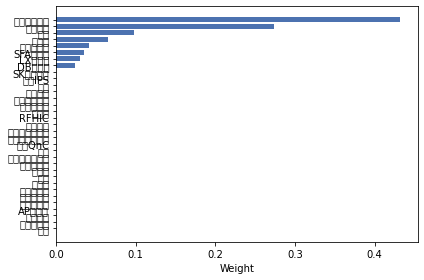

In [55]:
# 종목별 투자비중
pypfopt.plotting.plot_weights(weights, ax=None)

In [29]:
weights

OrderedDict([('SK하이닉스', 0.0),
             ('DB하이텍', 0.0241288118247744),
             ('리노공업', 0.2735387730104412),
             ('원익IPS', 0.0),
             ('고영', 0.0),
             ('LX세미콘', 0.0301105686190692),
             ('티씨케이', 0.0),
             ('이오테크닉스', 0.0),
             ('한미반도체', 0.0418140715756544),
             ('서울반도체', 0.0),
             ('네패스', 0.0),
             ('RFHIC', 0.0),
             ('유진테크', 0.0),
             ('테스나', 0.065597858237722),
             ('에스앤에스텍', 0.4325149887746649),
             ('SFA반도체', 0.0347882580877388),
             ('주성엔지니어링', 0.0),
             ('하나머티리얼즈', 0.0),
             ('원익QnC', 0.0),
             ('심텍', 0.0),
             ('이녹스첨단소재', 0.0),
             ('해성디에스', 0.0),
             ('테크윙', 0.0),
             ('테스', 0.0),
             ('코미코', 0.0),
             ('에프에스티', 0.0),
             ('엘비세미콘', 0.0),
             ('유니테스트', 0.0),
             ('미코', 0.0975066698699354),
             ('AP시스템', 0.0),
             ('케이씨텍', 0.

In [30]:
len(weights)

33

In [31]:
cleaned_weights

OrderedDict([('SK하이닉스', 0.0),
             ('DB하이텍', 0.02413),
             ('리노공업', 0.27354),
             ('원익IPS', 0.0),
             ('고영', 0.0),
             ('LX세미콘', 0.03011),
             ('티씨케이', 0.0),
             ('이오테크닉스', 0.0),
             ('한미반도체', 0.04181),
             ('서울반도체', 0.0),
             ('네패스', 0.0),
             ('RFHIC', 0.0),
             ('유진테크', 0.0),
             ('테스나', 0.0656),
             ('에스앤에스텍', 0.43251),
             ('SFA반도체', 0.03479),
             ('주성엔지니어링', 0.0),
             ('하나머티리얼즈', 0.0),
             ('원익QnC', 0.0),
             ('심텍', 0.0),
             ('이녹스첨단소재', 0.0),
             ('해성디에스', 0.0),
             ('테크윙', 0.0),
             ('테스', 0.0),
             ('코미코', 0.0),
             ('에프에스티', 0.0),
             ('엘비세미콘', 0.0),
             ('유니테스트', 0.0),
             ('미코', 0.09751),
             ('AP시스템', 0.0),
             ('케이씨텍', 0.0),
             ('원익홀딩스', 0.0),
             ('톱텍', 0.0)])

In [32]:
!pip install pulp

     |████████████████████████████████| 40.6 MB 32 kB/s 


## 💤

In [33]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# 투자금액 (단위: KRW)
portfolio_val = 15000000

latest_prices = get_latest_prices(df)

weights = cleaned_weights

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=portfolio_val)

allocation, leftover = da.lp_portfolio(verbose=False)


# print("{}: allocated {:.3f}, desired {:.3f}".format(ticker, allocation_weight, weight)
# print("Allocation has RMSE: {:.3f}".format(rmse))

print('Discrete Allocaion: ', allocation)
print('Funds Remaining: ', leftover, ' KRW')
# print('Allocation has RMSE: {:.3f}'.format(rmse))

# 평균 제곱근 오차(Root Mean Square Error; RMSE)
# 포트폴리오의 종목별 비중과 실제 할당된 비중 간의 차이

rmse = da._allocation_rmse_error(verbose=False)
# print('Allocation has RMSE: {:.5f}'.format(rmse))

Discrete Allocaion:  {'DB하이텍': 5, '리노공업': 22, 'LX세미콘': 4, '한미반도체': 17, '테스나': 19, '에스앤에스텍': 191, 'SFA반도체': 72, '미코': 98}
Funds Remaining:  2240.0  KRW
Allocation has RMSE: 0.001


In [34]:
allocation

{'DB하이텍': 5,
 'LX세미콘': 4,
 'SFA반도체': 72,
 '리노공업': 22,
 '미코': 98,
 '에스앤에스텍': 191,
 '테스나': 19,
 '한미반도체': 17}

In [35]:
len(allocation)

8

In [36]:
# 포트폴리오에 포함된 종목을 리스트로 만들기
company_name = list(allocation)

In [37]:
company_name

['DB하이텍', '리노공업', 'LX세미콘', '한미반도체', '테스나', '에스앤에스텍', 'SFA반도체', '미코']

In [38]:
len(company_name)

8

In [39]:
# Get the discrete allocation values
discrete_allocation_list = []
for symbol in allocation:
  discrete_allocation_list.append(allocation.get(symbol))

In [40]:
discrete_allocation_list

[5, 22, 4, 17, 19, 191, 72, 98]

In [42]:
# 최적화된 포트폴리오 결과 저장
portfolio_df['Company_name'] = company_name
portfolio_df['company_Ticker'] = allocation
portfolio_df['Discrete_val_'+str(portfolio_val)] = discrete_allocation_list

In [43]:
portfolio_df

,Company_name,company_Ticker,Discrete_val_15000000
0,DB하이텍,DB하이텍,5
1,리노공업,리노공업,22
2,LX세미콘,LX세미콘,4
3,한미반도체,한미반도체,17
4,테스나,테스나,19
5,에스앤에스텍,에스앤에스텍,191
6,SFA반도체,SFA반도체,72
7,미코,미코,98


In [44]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted = portfolio_df.sort_values('Discrete_val_'+str(portfolio_val), ascending = False)
portfolio_df_sorted = portfolio_df_sorted.reset_index(drop=True)
portfolio_df_sorted

,Company_name,company_Ticker,Discrete_val_15000000
0,에스앤에스텍,에스앤에스텍,191
1,미코,미코,98
2,SFA반도체,SFA반도체,72
3,리노공업,리노공업,22
4,테스나,테스나,19
5,한미반도체,한미반도체,17
6,DB하이텍,DB하이텍,5
7,LX세미콘,LX세미콘,4


In [45]:
# Show Funds Remaining
print('Funds Remaining: ', leftover, ' KRW')

# Show Portfolio performance
ef.portfolio_performance(verbose=True)

# Show RMSE
print('Allocation has RMSE: {:.3f}'.format(rmse))

Funds Remaining:  2240.0  KRW
Expected annual return: 74.5%
Annual volatility: 36.8%
Sharpe Ratio: 1.97
Allocation has RMSE: 0.001


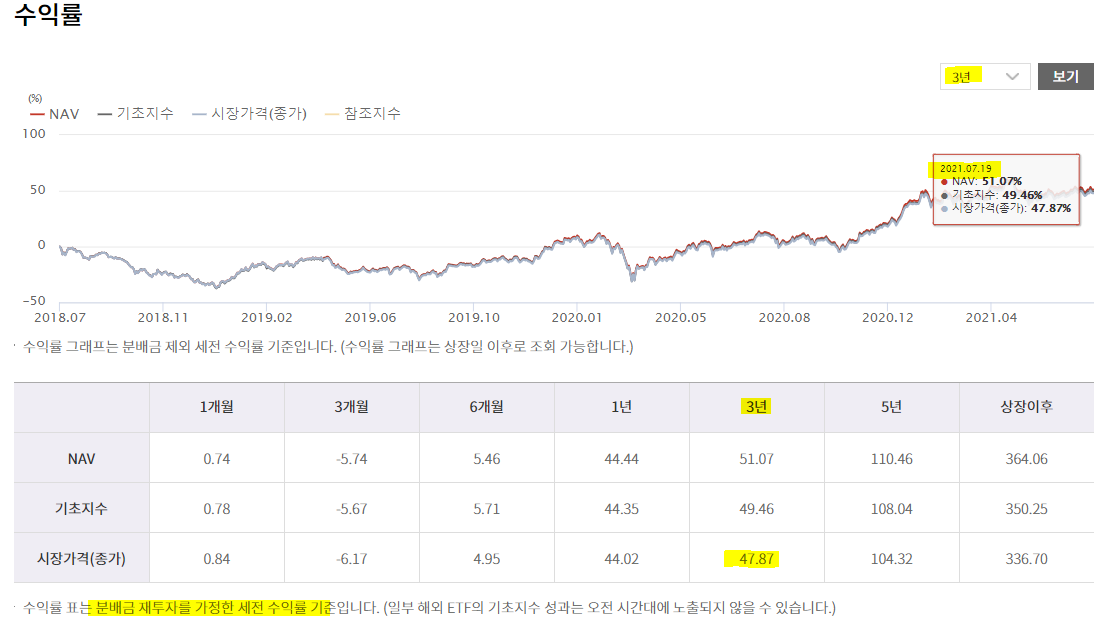

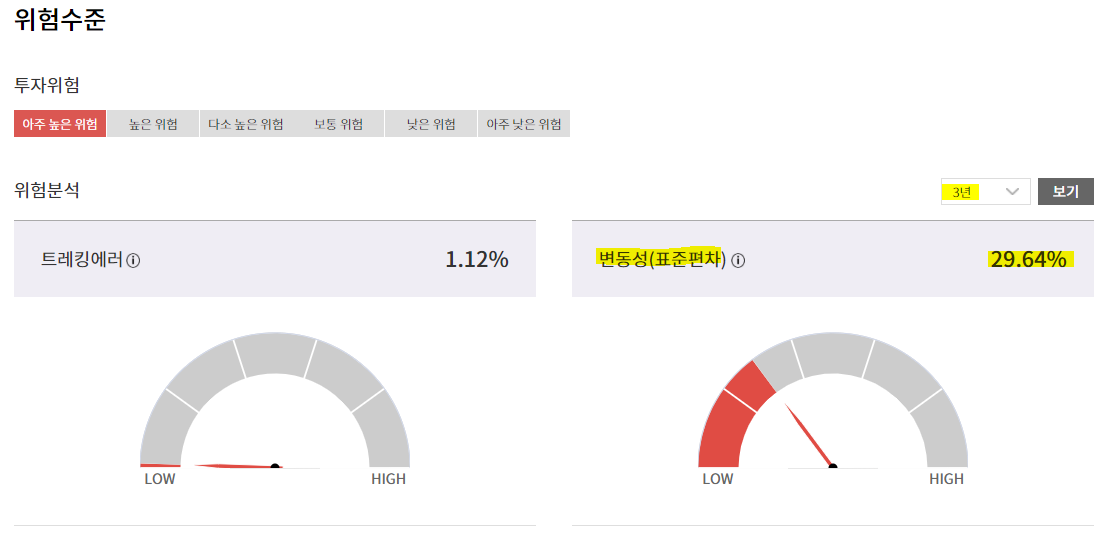

## 포트폴리오의 수익률과 변동성을 벤치마크지수(KOSPI)와 비교

In [46]:
df

,SK하이닉스,DB하이텍,리노공업,원익IPS,고영,LX세미콘,티씨케이,이오테크닉스,한미반도체,서울반도체,네패스,RFHIC,유진테크,테스나,에스앤에스텍,SFA반도체,주성엔지니어링,하나머티리얼즈,원익QnC,심텍,이녹스첨단소재,해성디에스,테크윙,테스,코미코,에프에스티,엘비세미콘,유니테스트,미코,AP시스템,케이씨텍,원익홀딩스,톱텍
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,90300,18250,66300,29100,22220,41900,72000,68600,10000,19650,12450,24636,16400,11673,4045,1980,8700,21200,15300,8515,53253,20350,14850,23950,31350,5680,4170,19300,4005,24300,17600,5490,26000
2018-07-20,87900,18200,66600,28200,21740,41950,70100,68000,9670,19050,12400,24538,16250,12001,4065,1980,8770,21900,15250,8620,53161,20150,14600,22650,32400,5730,4170,19950,3980,24350,17450,5560,25250
2018-07-23,81700,17050,64300,26700,20720,40250,64100,65500,9440,18250,12050,23758,15400,10868,4020,1925,8630,20050,14450,8353,51414,19150,14350,20850,30500,5210,4000,18000,3890,23250,16850,5240,24600
2018-07-24,83600,17400,65700,25800,22220,42200,63900,62100,9560,19850,12400,23465,15500,10390,3940,1930,8820,19850,14650,8458,52150,19050,14400,20700,31400,5420,4120,18100,3880,23300,17050,5290,24900
2018-07-25,80500,17350,64900,24550,21740,42700,62600,62300,9640,19600,11500,25465,14200,11447,3820,1855,8820,20250,14700,8467,52150,18750,13800,19950,30400,5390,4370,17800,3795,22700,16550,5070,24250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,123000,64500,188600,47400,23600,113500,198900,115200,33950,18850,42050,37600,42950,53700,32000,7300,14400,43550,28550,23300,65900,40400,25450,30300,64300,27400,13950,22200,13800,29900,28050,6270,12050
2021-07-14,123500,64400,186100,46600,23450,121200,195700,114000,33600,18600,41600,37350,42850,53300,31400,7240,14150,43450,28700,23250,65000,41700,25700,30200,64700,27100,14000,22100,14350,30050,27550,6230,11950
2021-07-15,123500,66200,188000,48400,23900,119200,196200,114400,34250,18950,42400,38800,43950,52700,35300,7410,14300,45550,29650,23950,67100,42300,25900,31000,65400,28800,14300,22350,14300,30700,28400,6320,12100


In [ ]:
cleaned_weights

OrderedDict([('SK하이닉스', 0.0),
             ('DB하이텍', 0.02413),
             ('리노공업', 0.27354),
             ('원익IPS', 0.0),
             ('고영', 0.0),
             ('LX세미콘', 0.03011),
             ('티씨케이', 0.0),
             ('이오테크닉스', 0.0),
             ('한미반도체', 0.04181),
             ('서울반도체', 0.0),
             ('네패스', 0.0),
             ('RFHIC', 0.0),
             ('유진테크', 0.0),
             ('테스나', 0.0656),
             ('에스앤에스텍', 0.43252),
             ('SFA반도체', 0.03479),
             ('주성엔지니어링', 0.0),
             ('하나머티리얼즈', 0.0),
             ('원익QnC', 0.0),
             ('심텍', 0.0),
             ('이녹스첨단소재', 0.0),
             ('해성디에스', 0.0),
             ('테크윙', 0.0),
             ('테스', 0.0),
             ('코미코', 0.0),
             ('에프에스티', 0.0),
             ('엘비세미콘', 0.0),
             ('유니테스트', 0.0),
             ('미코', 0.09751),
             ('AP시스템', 0.0),
             ('케이씨텍', 0.0),
             ('원익홀딩스', 0.0),
             ('톱텍', 0.0)])

In [ ]:
len(cleaned_weights)

33

In [ ]:
# 1씩 더하기
cleaned_weights_p1 = dict(zip(cleaned_weights.keys(),map(lambda x:x[1]+1,cleaned_weights.items())))
cleaned_weights_p1

{'AP시스템': 1.0,
 'DB하이텍': 1.02413,
 'LX세미콘': 1.03011,
 'RFHIC': 1.0,
 'SFA반도체': 1.03479,
 'SK하이닉스': 1.0,
 '고영': 1.0,
 '네패스': 1.0,
 '리노공업': 1.2735400000000001,
 '미코': 1.09751,
 '서울반도체': 1.0,
 '심텍': 1.0,
 '에스앤에스텍': 1.43252,
 '에프에스티': 1.0,
 '엘비세미콘': 1.0,
 '원익IPS': 1.0,
 '원익QnC': 1.0,
 '원익홀딩스': 1.0,
 '유니테스트': 1.0,
 '유진테크': 1.0,
 '이녹스첨단소재': 1.0,
 '이오테크닉스': 1.0,
 '주성엔지니어링': 1.0,
 '케이씨텍': 1.0,
 '코미코': 1.0,
 '테스': 1.0,
 '테스나': 1.0656,
 '테크윙': 1.0,
 '톱텍': 1.0,
 '티씨케이': 1.0,
 '하나머티리얼즈': 1.0,
 '한미반도체': 1.04181,
 '해성디에스': 1.0}

In [ ]:
# 각 일자별, 종목별 종가에 해당 weights를 곱해주기
for i, weight in cleaned_weights_p1.items():
    df[i] = df[i]*weight

In [ ]:
df

,SK하이닉스,DB하이텍,리노공업,원익IPS,고영,LX세미콘,티씨케이,이오테크닉스,한미반도체,서울반도체,네패스,RFHIC,유진테크,테스나,에스앤에스텍,SFA반도체,주성엔지니어링,하나머티리얼즈,원익QnC,심텍,이녹스첨단소재,해성디에스,테크윙,테스,코미코,에프에스티,엘비세미콘,유니테스트,미코,AP시스템,케이씨텍,원익홀딩스,톱텍
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,90300.0,18690.3725,84435.702,29100.0,22220.0,43161.6090,72000.0,68600.0,10418.1000,19650.0,12450.0,24636.0,16400.0,12438.7488,5794.5434,2048.88420,8700.0,21200.0,15300.0,8515.0,53253.0,20350.0,14850.0,23950.0,31350.0,5680.0,4170.0,19300.0,4395.52755,24300.0,17600.0,5490.0,26000.0
2018-07-20,87900.0,18639.1660,84817.764,28200.0,21740.0,43213.1145,70100.0,68000.0,10074.3027,19050.0,12400.0,24538.0,16250.0,12788.2656,5823.1938,2048.88420,8770.0,21900.0,15250.0,8620.0,53161.0,20150.0,14600.0,22650.0,32400.0,5730.0,4170.0,19950.0,4368.08980,24350.0,17450.0,5560.0,25250.0
2018-07-23,81700.0,17461.4165,81888.622,26700.0,20720.0,41461.9275,64100.0,65500.0,9834.6864,18250.0,12050.0,23758.0,15400.0,11580.9408,5758.7304,1991.97075,8630.0,20050.0,14450.0,8353.0,51414.0,19150.0,14350.0,20850.0,30500.0,5210.0,4000.0,18000.0,4269.31390,23250.0,16850.0,5240.0,24600.0
2018-07-24,83600.0,17819.8620,83671.578,25800.0,22220.0,43470.6420,63900.0,62100.0,9959.7036,19850.0,12400.0,23465.0,15500.0,11071.5840,5644.1288,1997.14470,8820.0,19850.0,14650.0,8458.0,52150.0,19050.0,14400.0,20700.0,31400.0,5420.0,4120.0,18100.0,4258.33880,23300.0,17050.0,5290.0,24900.0
2018-07-25,80500.0,17768.6555,82652.746,24550.0,21740.0,43985.6970,62600.0,62300.0,10043.0484,19600.0,11500.0,25465.0,14200.0,12197.9232,5472.2264,1919.53545,8820.0,20250.0,14700.0,8467.0,52150.0,18750.0,13800.0,19950.0,30400.0,5390.0,4370.0,17800.0,4165.05045,22700.0,16550.0,5070.0,24250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,123000.0,66056.3850,240189.644,47400.0,23600.0,116917.4850,198900.0,115200.0,35369.4495,18850.0,42050.0,37600.0,42950.0,57222.7200,45840.6400,7553.96700,14400.0,43550.0,28550.0,23300.0,65900.0,40400.0,25450.0,30300.0,64300.0,27400.0,13950.0,22200.0,15145.63800,29900.0,28050.0,6270.0,12050.0
2021-07-14,123500.0,65953.9720,237005.794,46600.0,23450.0,124849.3320,195700.0,114000.0,35004.8160,18600.0,41600.0,37350.0,42850.0,56796.4800,44981.1280,7491.87960,14150.0,43450.0,28700.0,23250.0,65000.0,41700.0,25700.0,30200.0,64700.0,27100.0,14000.0,22100.0,15749.26850,30050.0,27550.0,6230.0,11950.0
2021-07-15,123500.0,67797.4060,239425.520,48400.0,23900.0,122789.1120,196200.0,114400.0,35681.9925,18950.0,42400.0,38800.0,43950.0,56157.1200,50567.9560,7667.79390,14300.0,45550.0,29650.0,23950.0,67100.0,42300.0,25900.0,31000.0,65400.0,28800.0,14300.0,22350.0,15694.39300,30700.0,28400.0,6320.0,12100.0


In [ ]:
# 일자별 종목의 (종가*비중) 합계를 Port열에 저장
df['Port'] = df.sum(axis = 1)
df

,SK하이닉스,DB하이텍,리노공업,원익IPS,고영,LX세미콘,티씨케이,이오테크닉스,한미반도체,서울반도체,네패스,RFHIC,유진테크,테스나,에스앤에스텍,SFA반도체,주성엔지니어링,하나머티리얼즈,원익QnC,심텍,이녹스첨단소재,해성디에스,테크윙,테스,코미코,에프에스티,엘비세미콘,유니테스트,미코,AP시스템,케이씨텍,원익홀딩스,톱텍,Port
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,90300.0,18690.3725,84435.702,29100.0,22220.0,43161.6090,72000.0,68600.0,10418.1000,19650.0,12450.0,24636.0,16400.0,12438.7488,5794.5434,2048.88420,8700.0,21200.0,15300.0,8515.0,53253.0,20350.0,14850.0,23950.0,31350.0,5680.0,4170.0,19300.0,4395.52755,24300.0,17600.0,5490.0,26000.0,8.367475e+05
2018-07-20,87900.0,18639.1660,84817.764,28200.0,21740.0,43213.1145,70100.0,68000.0,10074.3027,19050.0,12400.0,24538.0,16250.0,12788.2656,5823.1938,2048.88420,8770.0,21900.0,15250.0,8620.0,53161.0,20150.0,14600.0,22650.0,32400.0,5730.0,4170.0,19950.0,4368.08980,24350.0,17450.0,5560.0,25250.0,8.299118e+05
2018-07-23,81700.0,17461.4165,81888.622,26700.0,20720.0,41461.9275,64100.0,65500.0,9834.6864,18250.0,12050.0,23758.0,15400.0,11580.9408,5758.7304,1991.97075,8630.0,20050.0,14450.0,8353.0,51414.0,19150.0,14350.0,20850.0,30500.0,5210.0,4000.0,18000.0,4269.31390,23250.0,16850.0,5240.0,24600.0,7.873226e+05
2018-07-24,83600.0,17819.8620,83671.578,25800.0,22220.0,43470.6420,63900.0,62100.0,9959.7036,19850.0,12400.0,23465.0,15500.0,11071.5840,5644.1288,1997.14470,8820.0,19850.0,14650.0,8458.0,52150.0,19050.0,14400.0,20700.0,31400.0,5420.0,4120.0,18100.0,4258.33880,23300.0,17050.0,5290.0,24900.0,7.943860e+05
2018-07-25,80500.0,17768.6555,82652.746,24550.0,21740.0,43985.6970,62600.0,62300.0,10043.0484,19600.0,11500.0,25465.0,14200.0,12197.9232,5472.2264,1919.53545,8820.0,20250.0,14700.0,8467.0,52150.0,18750.0,13800.0,19950.0,30400.0,5390.0,4370.0,17800.0,4165.05045,22700.0,16550.0,5070.0,24250.0,7.840769e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,123000.0,66056.3850,240189.644,47400.0,23600.0,116917.4850,198900.0,115200.0,35369.4495,18850.0,42050.0,37600.0,42950.0,57222.7200,45840.6400,7553.96700,14400.0,43550.0,28550.0,23300.0,65900.0,40400.0,25450.0,30300.0,64300.0,27400.0,13950.0,22200.0,15145.63800,29900.0,28050.0,6270.0,12050.0,1.709816e+06
2021-07-14,123500.0,65953.9720,237005.794,46600.0,23450.0,124849.3320,195700.0,114000.0,35004.8160,18600.0,41600.0,37350.0,42850.0,56796.4800,44981.1280,7491.87960,14150.0,43450.0,28700.0,23250.0,65000.0,41700.0,25700.0,30200.0,64700.0,27100.0,14000.0,22100.0,15749.26850,30050.0,27550.0,6230.0,11950.0,1.707313e+06
2021-07-15,123500.0,67797.4060,239425.520,48400.0,23900.0,122789.1120,196200.0,114400.0,35681.9925,18950.0,42400.0,38800.0,43950.0,56157.1200,50567.9560,7667.79390,14300.0,45550.0,29650.0,23950.0,67100.0,42300.0,25900.0,31000.0,65400.0,28800.0,14300.0,22350.0,15694.39300,30700.0,28400.0,6320.0,12100.0,1.734401e+06


In [ ]:
# 일자별 종가의 전일대비 변동률(수익률)을 portfolio라는 데이터프레임으로 저장
portfolio = df[['Port']].pct_change()
portfolio

,Port
Date,
2018-07-19,NaN
2018-07-20,-0.008169
2018-07-23,-0.051318
2018-07-24,0.008971
2018-07-25,-0.012977
...,...
2021-07-13,0.011103
2021-07-14,-0.001464
2021-07-15,0.015866


In [ ]:
# 코스피지수 불러오기
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

,Close
Date,
2018-07-19,2282.29
2018-07-20,2289.19
2018-07-23,2269.31
2018-07-24,2280.20
2018-07-25,2273.03
...,...
2021-07-13,3271.38
2021-07-14,3264.81
2021-07-15,3286.22


In [ ]:
# 코스피지수의 변동률(수익률) 구하기
# 변동률(수익률) = (당일가격-전일가격) / 전일가격
# 7/20의 변동률(수익률) = (7/20 가격-7-19 가격) / 7/19 가격
kospi_pct = kospi.pct_change()
kospi_pct

,Close
Date,
2018-07-19,NaN
2018-07-20,0.003023
2018-07-23,-0.008684
2018-07-24,0.004799
2018-07-25,-0.003144
...,...
2021-07-13,0.007673
2021-07-14,-0.002008
2021-07-15,0.006558


In [ ]:
# 코스피와 포트폴리오 합치기
result = kospi_pct.join(portfolio)
result

,Close,Port
Date,,
2018-07-19,NaN,NaN
2018-07-20,0.003023,-0.008169
2018-07-23,-0.008684,-0.051318
2018-07-24,0.004799,0.008971
2018-07-25,-0.003144,-0.012977
...,...,...
2021-07-13,0.007673,0.011103
2021-07-14,-0.002008,-0.001464
2021-07-15,0.006558,0.015866


In [ ]:
# 1열을 0으로 
result.iloc[0] = 0
result

,Close,Port
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.008169
2018-07-23,-0.008684,-0.051318
2018-07-24,0.004799,0.008971
2018-07-25,-0.003144,-0.012977
...,...,...
2021-07-13,0.007673,0.011103
2021-07-14,-0.002008,-0.001464
2021-07-15,0.006558,0.015866


In [ ]:
# 열 이름 변경
result.columns = ['KOSPI', 'PORTFOLIO']
result

,KOSPI,PORTFOLIO
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.008169
2018-07-23,-0.008684,-0.051318
2018-07-24,0.004799,0.008971
2018-07-25,-0.003144,-0.012977
...,...,...
2021-07-13,0.007673,0.011103
2021-07-14,-0.002008,-0.001464
2021-07-15,0.006558,0.015866


In [ ]:
# 1에서 시작해서, 전일대비 변동률(수익률)을 적용하여 수치화하기
wealth = (1+result).cumprod()
wealth

,KOSPI,PORTFOLIO
Date,,
2018-07-19,1.000000,1.000000
2018-07-20,1.003023,0.991831
2018-07-23,0.994313,0.940932
2018-07-24,0.999084,0.949374
2018-07-25,0.995943,0.937053
...,...,...
2021-07-13,1.433376,2.043407
2021-07-14,1.430497,2.040416
2021-07-15,1.439878,2.072789


#### 한글 폰트 설정

글꼴 설치. 설치 완료 후 런타임 재시작 (colab 구동 특성 상 새로 열 때마다 반복)

In [ ]:
!apt install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
# 한글 깨짐 관련 해결 방법 (나눔폰트)
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings("ignore")

matplotlib.font_manager._rebuild()     # json 파일에 업데이트 해주기

plt.rc('font', family='NanumGothic')    # 폰트 적용 (or  plt.rcParams['font.family'] = 'NanumGothic'  )

matplotlib.rcParams['axes.unicode_minus'] = False    # 마이너스 기호 표시 추가

In [ ]:
# matplotlib 적용 폰트 확인
import matplotlib as mat
print(mat.rcParams['font.family'])

['NanumGothic']


In [ ]:
# 설치된 폰트 목록 확인
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmsy10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'cmtt10',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'cmb10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans',
 'cmmi10',
 'STIXSizeThreeSym',
 'STIXSizeThreeSym',
 'STIXSizeFiveSym',
 'DejaVu Serif',
 'cmr10',
 'DejaVu Sans Mono',
 'cmss10',
 'DejaVu Sans',
 'cmex10',
 'STIXGeneral',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'Liberation Sans',
 'Liberation Serif',
 'Liberation Serif',
 'Liberation Mono',
 'Liberation Sans Narrow',
 'NanumSquareRound',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'NanumMyeongjo',
 'Liberation Sans Narrow',
 'NanumMyeongjo',
 'Liberation Sans',
 'Liberation Mono',
 'Humor Sans',
 'Liberation Sans Narrow',

In [ ]:
# matplotlib 화질 높이는 방법
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

### 시각화

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


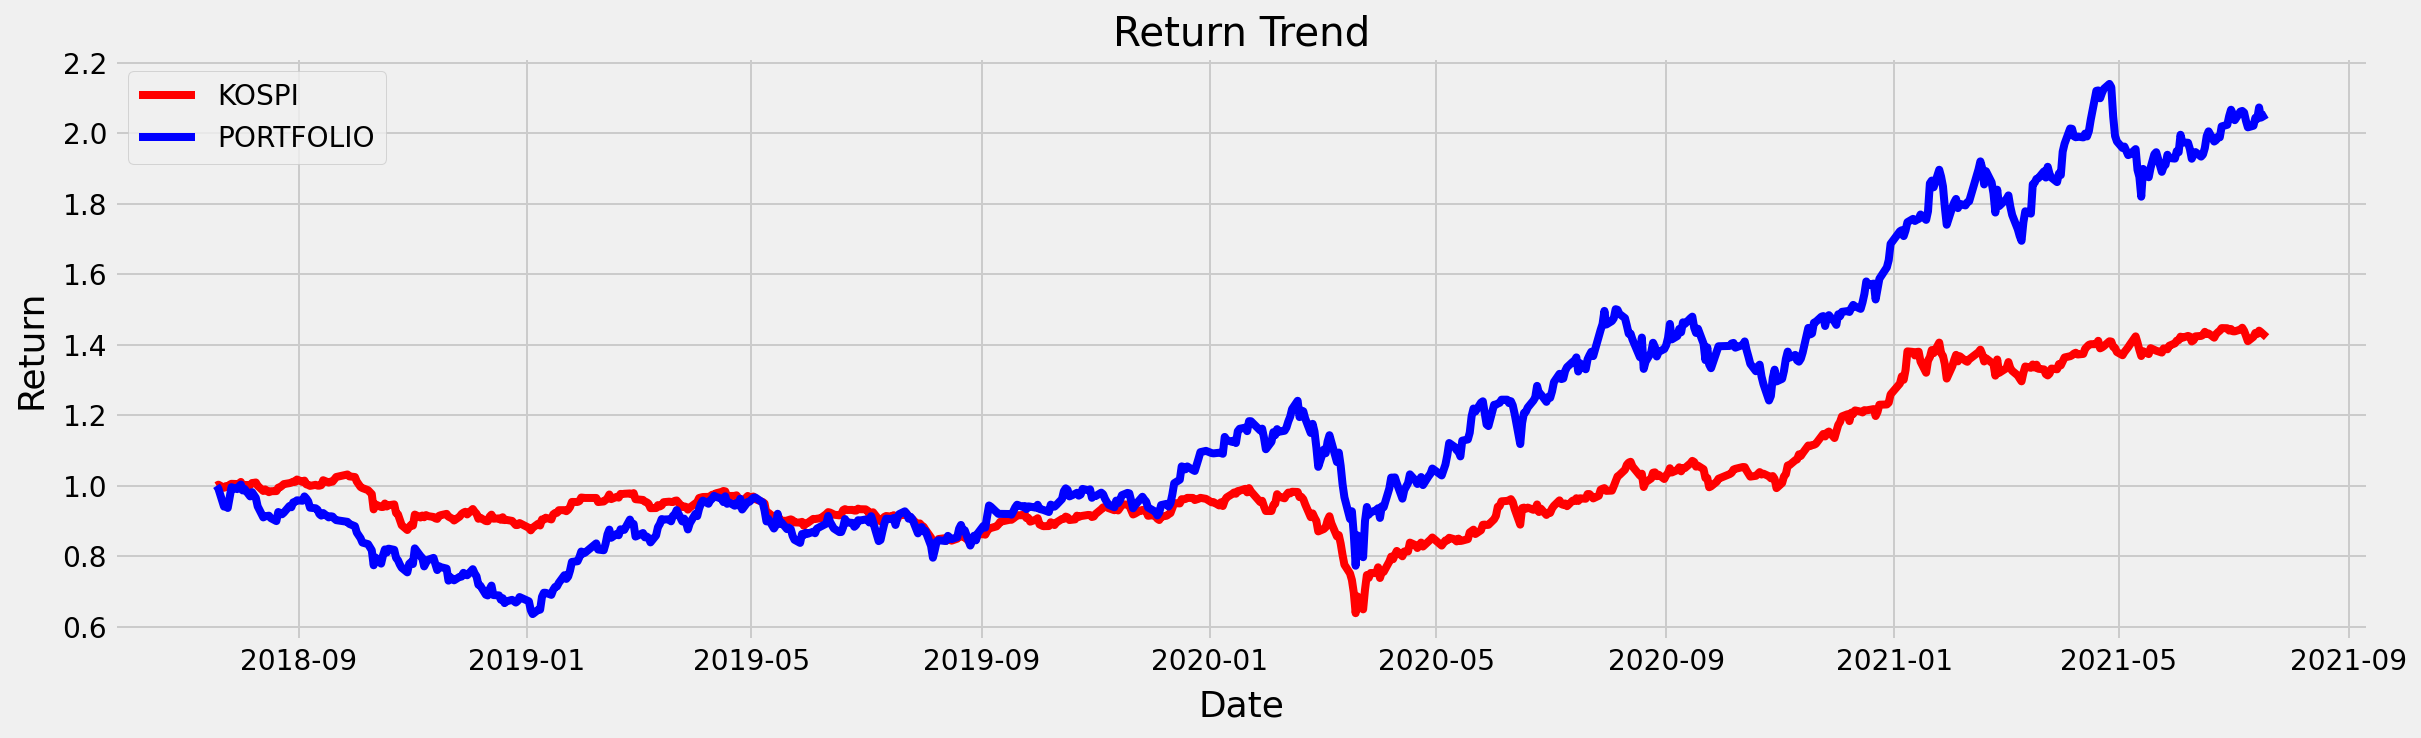

In [ ]:
# 포트폴리오와 KOSPI 지수의 '누적 수익률 추이'를 시각화하여 비교

# matplotlib.pyplot 스타일시트 설정
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth.index, wealth.KOSPI , 'r', label='KOSPI')
plt.plot(wealth.index, wealth.PORTFOLIO ,'b', label="PORTFOLIO")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.show()

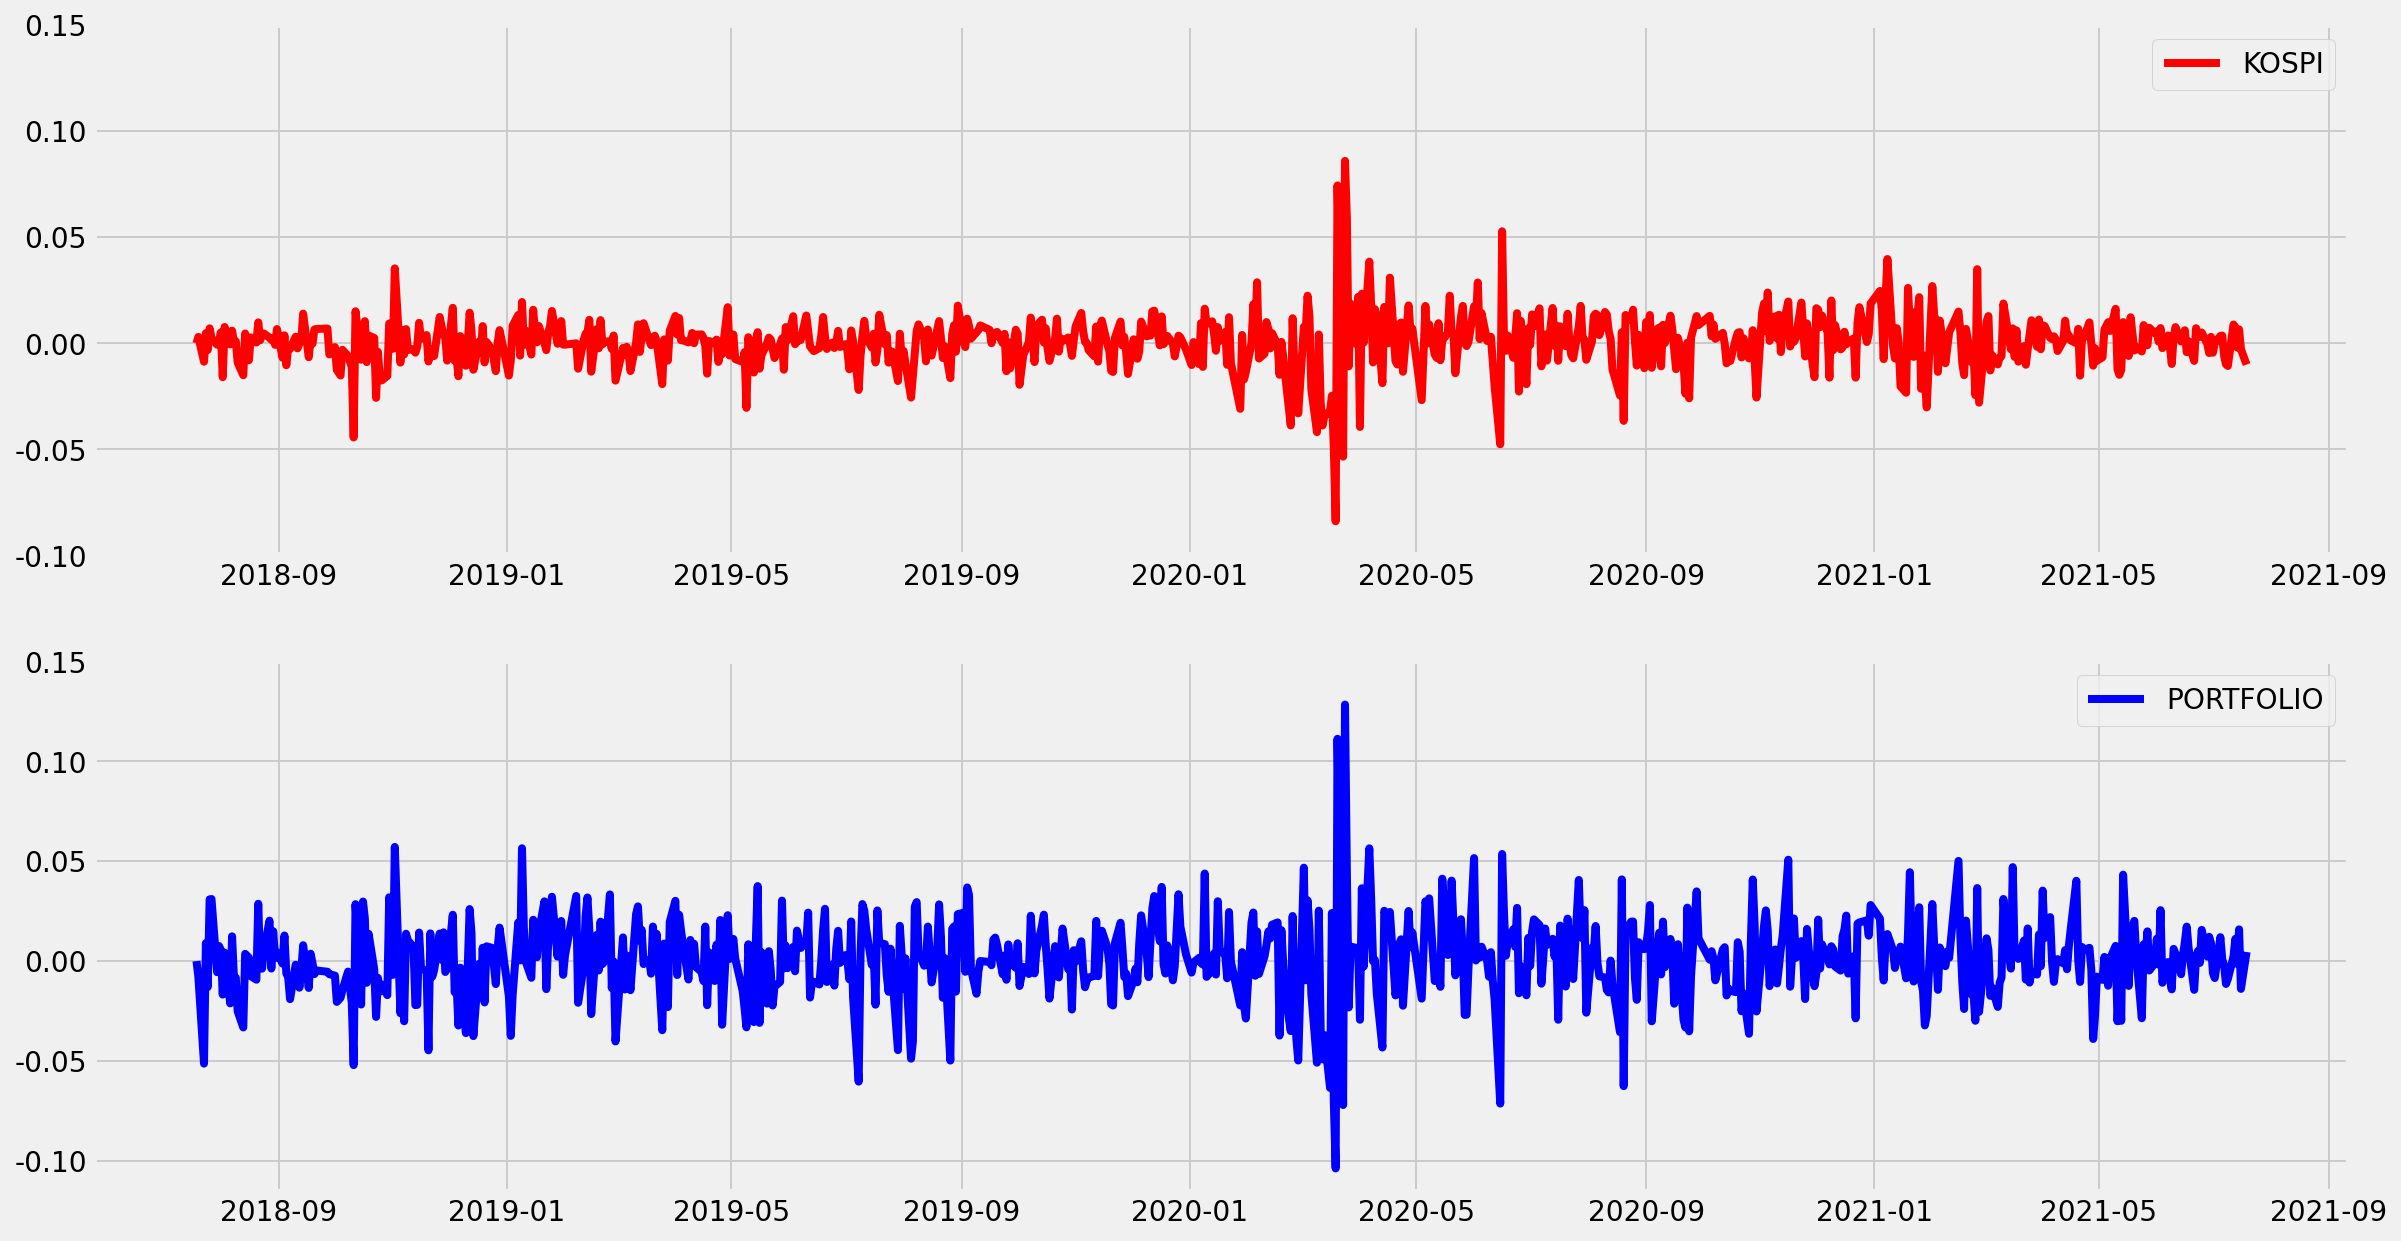

In [ ]:
# 변동률 비교
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.plot(result.index, result.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)

plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(result.index, result.PORTFOLIO ,'b', label="PORTFOLIO")
plt.yticks([-0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.legend(loc='best')

plt.grid(True)
plt.show()